## Math 32; Fall 2025
### Lectuer 19 - October 13, 2025; Suzanne Fernandes-Sindi
The following code is used to generate examples in Math 32 for Lecture 19. We will do 3 examples:

- Example 1: Summing 4 Dice
- Example 2: Simulating Dow Jones Industrial Averages
- Example 3: Calculating $\pi$

## Example 1: Summing 4 Dice

In [3]:
from random import randint
X1 = randint(1,6)
X2 = randint(1,6)
X3 = randint(1,6)
X4 = randint(1,6)
Y = X1 + X2 + X3 + X4
print("The sum of the dice is",Y)

The sum of the dice is 16


In [6]:
#Import libraries
import numpy as np
from random import randint

#Numer of experiments to run
nSample = 10000
#List containting the realiations
YList = []
for _ in range(nSample):
    X1 = randint(1,6)
    X2 = randint(1,6)
    X3 = randint(1,6)
    X4 = randint(1,6)
    Y = X1 + X2 + X3 + X4
    #Saves to the list
    YList.append(Y)

E[Y] = 14.0271
Standard deviation = 3.3851684729123894
P(Y>20) = 0.0268


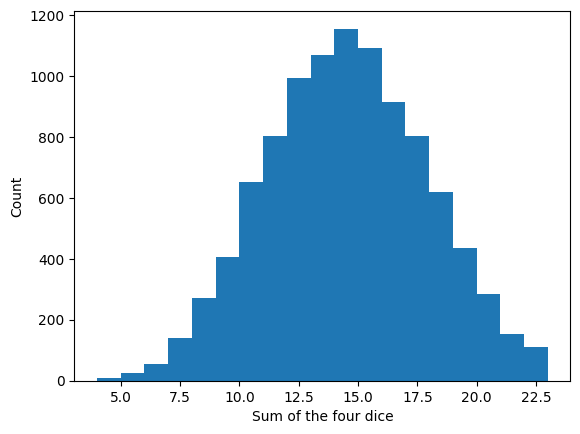

In [7]:
#Imports libraries
import matplotlib.pyplot as plt

print("E[Y] =",np.mean(YList))
print("Standard deviation =",np.std(YList))
print("P(Y>20) =", np.mean([ y>20 for y in YList]))

#Plots the values in a histogram
plt.hist(YList, bins=range(4,24))
plt.xlabel("Sum of the four dice")
plt.ylabel("Count")
plt.show()

## Example 2: Simulating Dow Jones Industrial Averages

Note: This is just a simulation, in practice one could have pulled out the True Dow Jones Industrial Average. I elected to pick one simulation and make it the *real* one.

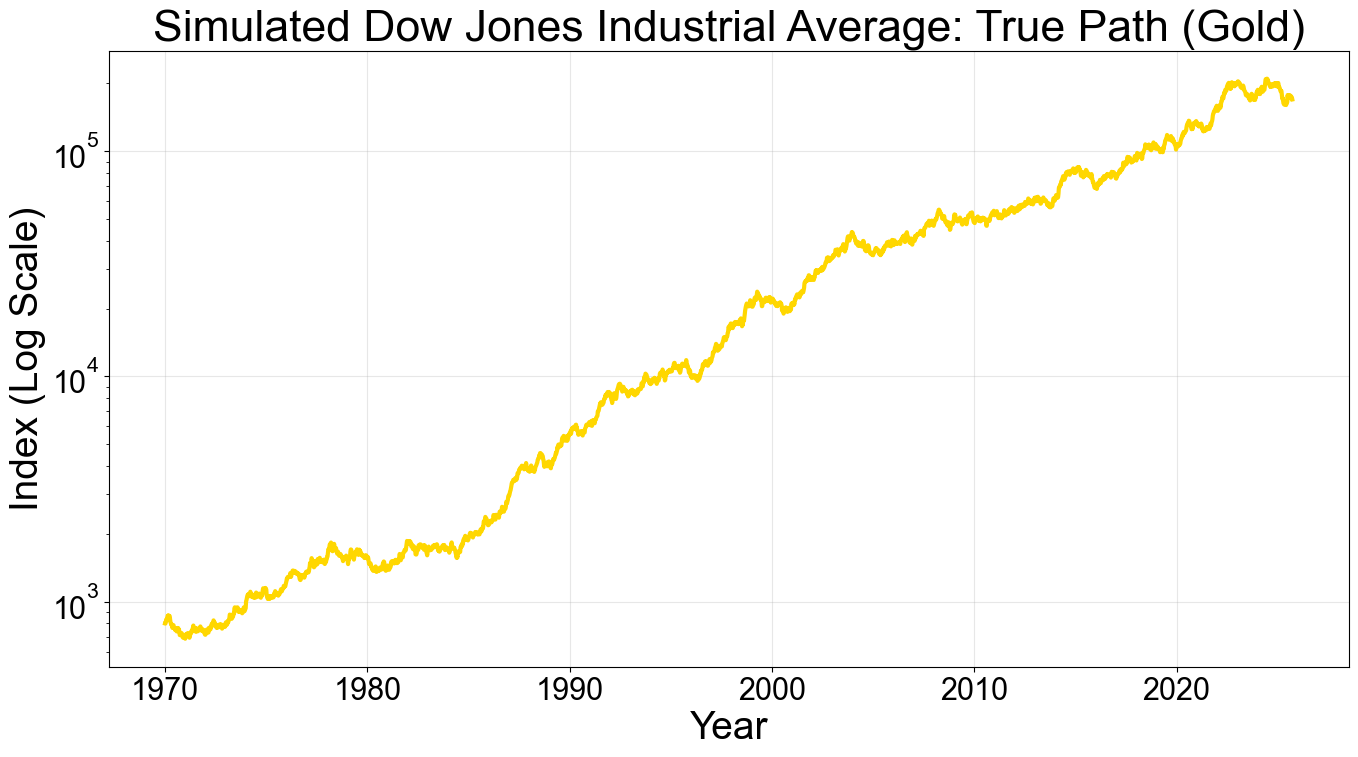

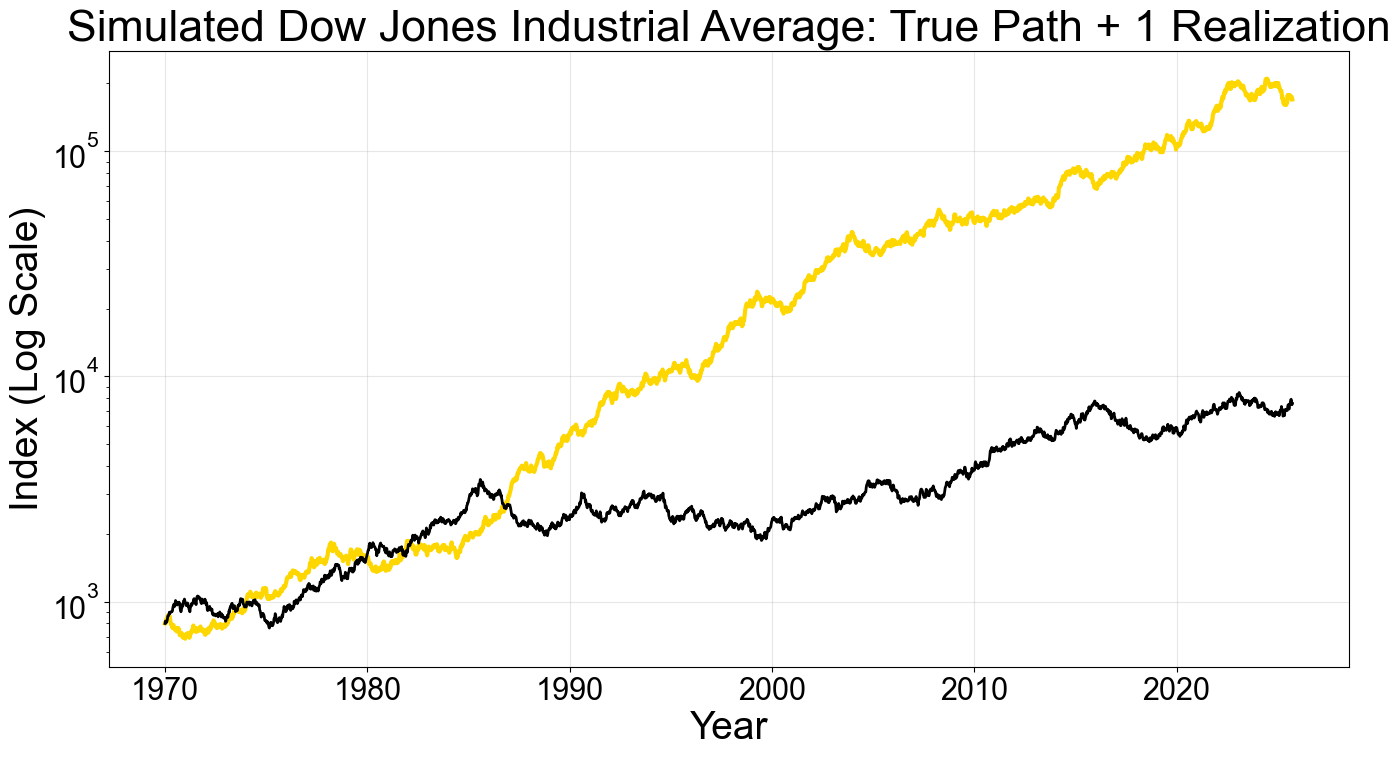

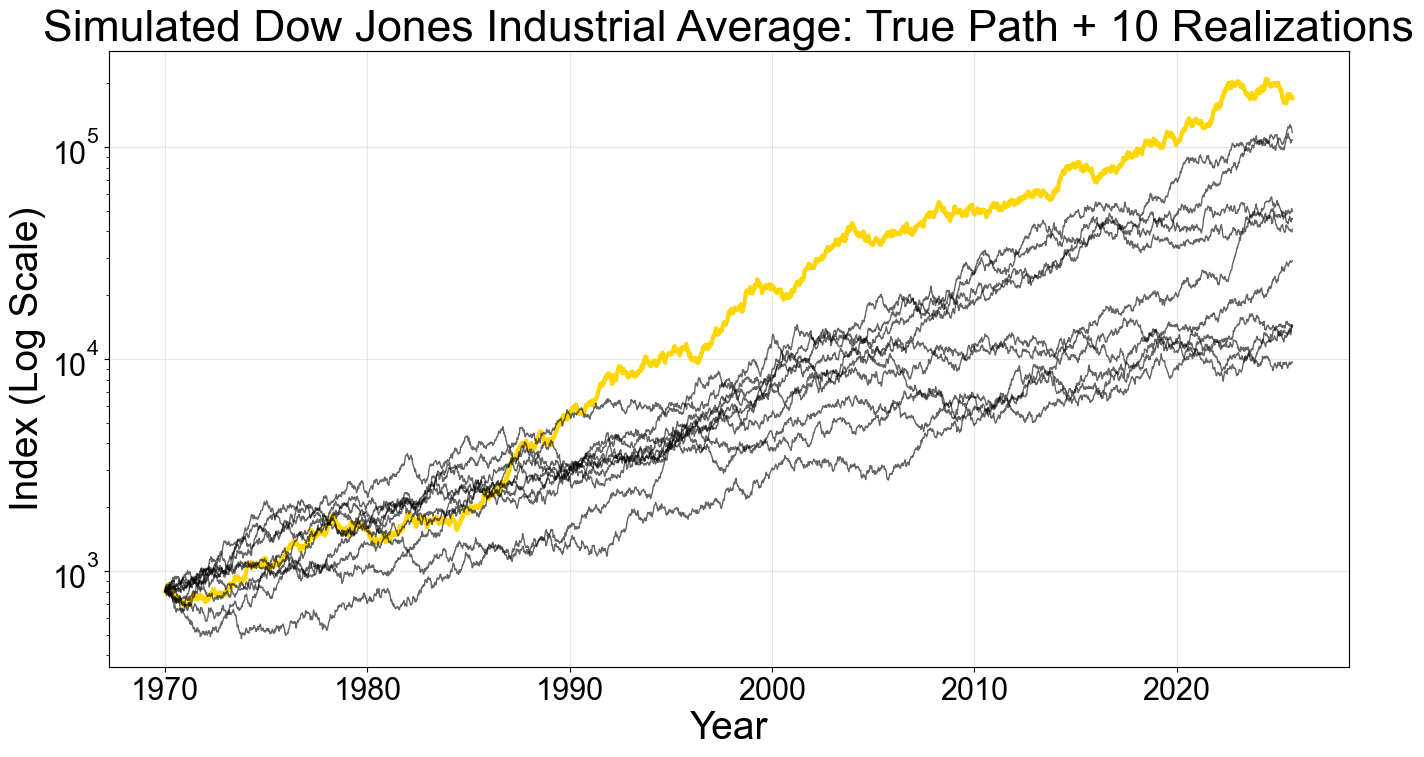

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta

# --- Parameters ---
np.random.seed(42)
x0 = 800
mu = 0.0013
sigma2 = 0.00032
sigma = np.sqrt(sigma2)

# --- Time setup ---
start = date(1970, 1, 4)
end = date(2025, 10, 1)
weeks = (end - start).days // 7
dates = [start + timedelta(weeks=i) for i in range(weeks)]
years = np.array([d.year + (d.timetuple().tm_yday-1)/365.0 for d in dates])

# --- Font settings (really big!) ---
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "axes.titlesize": 32,   # title very large
    "axes.labelsize": 28,   # axis labels huge
    "xtick.labelsize": 22,  # tick labels big
    "ytick.labelsize": 22
})

# --- Function to simulate DJIA path ---
def simulate_djia(weeks, x0, mu, sigma):
    r = np.random.normal(mu, sigma, size=weeks)
    djia = np.zeros(weeks)
    djia[0] = x0
    for i in range(1, weeks):
        djia[i] = djia[i-1] * np.exp(r[i])
    return djia

# --- 1) Gold path alone ---
djia_true = simulate_djia(weeks, x0, mu, sigma)
plt.figure(figsize=(16,8))
plt.plot(years, djia_true, color='gold', lw=3)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Index (Log Scale)')
plt.title('Simulated Dow Jones Industrial Average: True Path (Gold)')
plt.grid(alpha=0.3)
plt.show()

# --- 2) Gold + 1 Black ---
djia_black1 = simulate_djia(weeks, x0, mu, sigma)
plt.figure(figsize=(16,8))
plt.plot(years, djia_true, color='gold', lw=3)
plt.plot(years, djia_black1, color='black', lw=2)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Index (Log Scale)')
plt.title('Simulated Dow Jones Industrial Average: True Path + 1 Realization')
plt.grid(alpha=0.3)
plt.show()

# --- 3) Gold + 10 Black ---
plt.figure(figsize=(16,8))
plt.plot(years, djia_true, color='gold', lw=3)
for _ in range(10):
    djia_black = simulate_djia(weeks, x0, mu, sigma)
    plt.plot(years, djia_black, color='black', lw=1, alpha=0.6)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Index (Log Scale)')
plt.title('Simulated Dow Jones Industrial Average: True Path + 10 Realizations')
plt.grid(alpha=0.3)
plt.show()


## Example 3: Calculating $\pi$

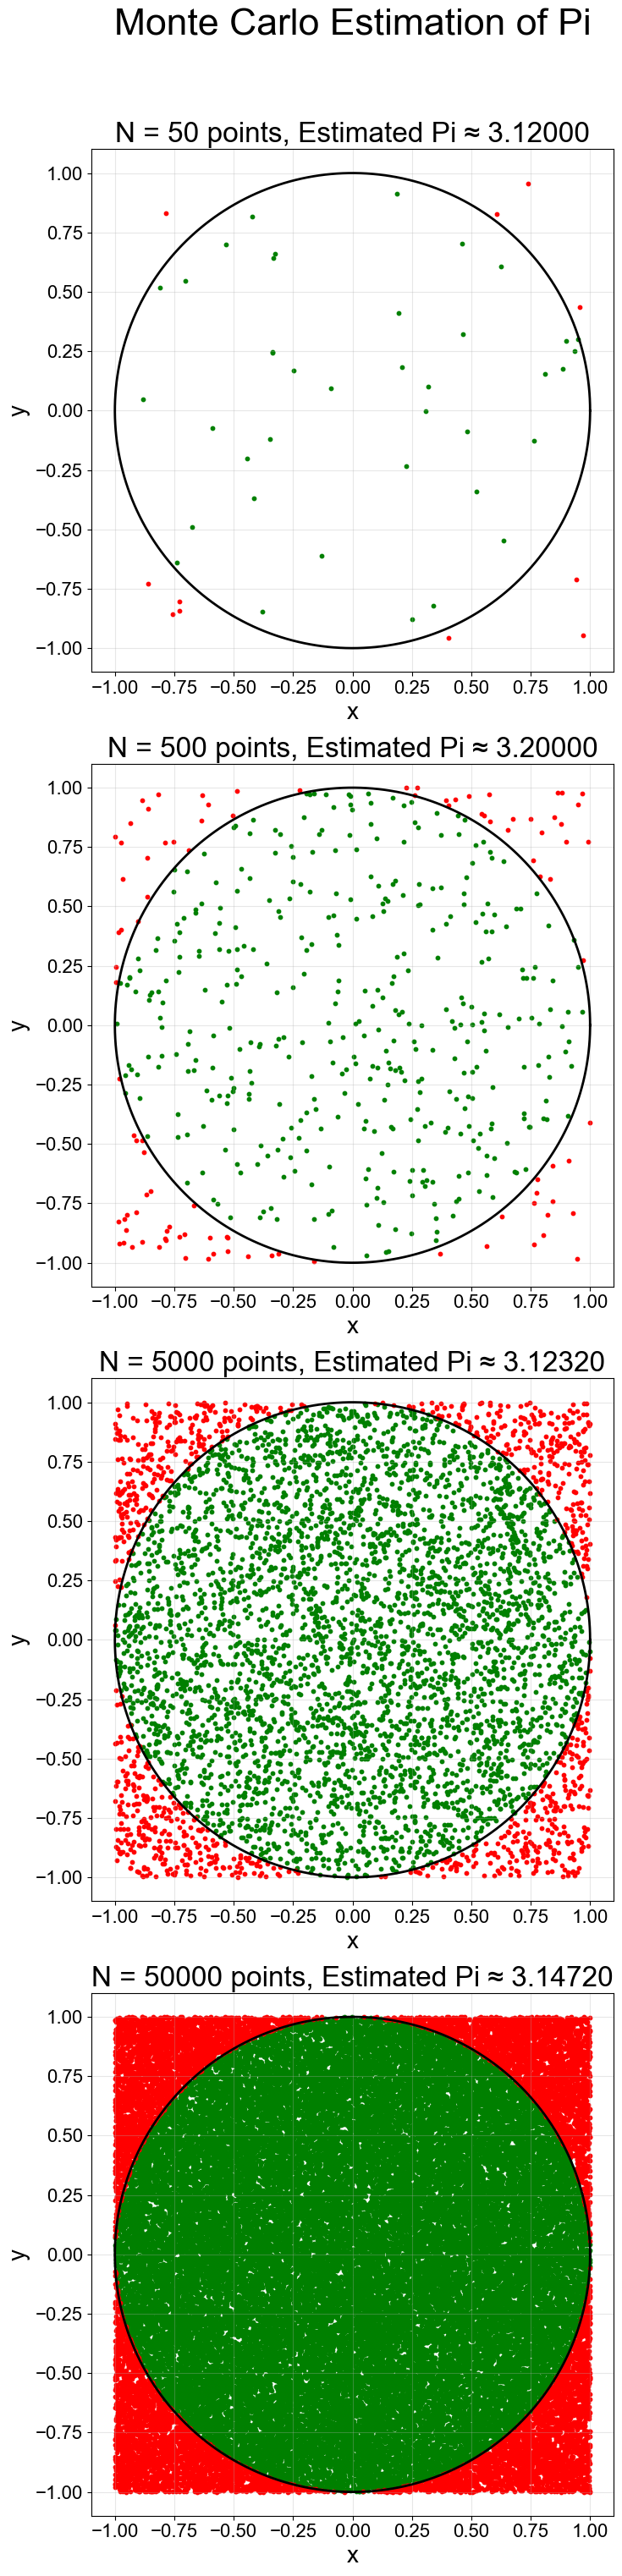

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- Font settings ---
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "axes.titlesize": 24,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

# --- Monte Carlo Pi simulation ---
def monte_carlo_pi(N):
    x = np.random.uniform(-1,1,N)
    y = np.random.uniform(-1,1,N)
    inside = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside) / N
    return x, y, inside, pi_estimate

# --- Number of points for each plot ---
points_list = [50, 500, 5000, 50000]

# --- Create figure ---
fig, axes = plt.subplots(len(points_list), 1, figsize=(10, 32))  # tall figure
plt.suptitle('Monte Carlo Estimation of Pi', fontsize=32, y=0.95)

for ax, N in zip(axes, points_list):
    x, y, inside, pi_est = monte_carlo_pi(N)
    
    ax.scatter(x[inside], y[inside], color='green', s=10, label='Inside Circle')
    ax.scatter(x[~inside], y[~inside], color='red', s=10, label='Outside Circle')
    
    # Unit circle outline
    theta = np.linspace(0, 2*np.pi, 500)
    ax.plot(np.cos(theta), np.sin(theta), color='black', lw=2)
    
    ax.set_aspect('equal')
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'N = {N} points, Estimated Pi ≈ {pi_est:.5f}')
    ax.grid(alpha=0.3)

plt.tight_layout(rect=[0,0,1,0.93])  # leave space for suptitle
plt.show()
